In [34]:
from nbdev.showdoc import *
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
from sympy import *
from typing import Tuple
from functools import partial
import diffusion_curvature
from diffusion_curvature.datasets import *
from diffusion_curvature.curves import *
from diffusion_curvature.comparisons import *
from diffusion_curvature.core import plot_3d, diffusion_matrix, gaussian_kernel
# Reload any changes made to external files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
noise_levels = [0,0.2,0.4,0.6]

In [36]:
# get noisy tori
Tori = {}
Tori_ks_true = {}
for nl in noise_levels:
    X, ks = torus(n=4000,noise=nl)
    Tori[nl] = X
    Tori_ks_true[nl] = ks

In [ ]:
# get noisy tori
Ellipsoids = {}
Ellipsoids_ks = {}
for nl in noise_levels:
    X, ks = 
    Tori[nl] = X
    Tori_ks_true[nl] = ks

In [37]:
#Compute diffusion curvature
Tori_ks_diffusion = {}
for nl in tqdm(noise_levels):
    Tori_ks_diffusion[nl] = diffusion_curvature_contra_noise(Tori[nl], dimension=2, t=8,k=10)

  0%|          | 0/4 [00:00<?, ?it/s]

# Ground Truth Curvature

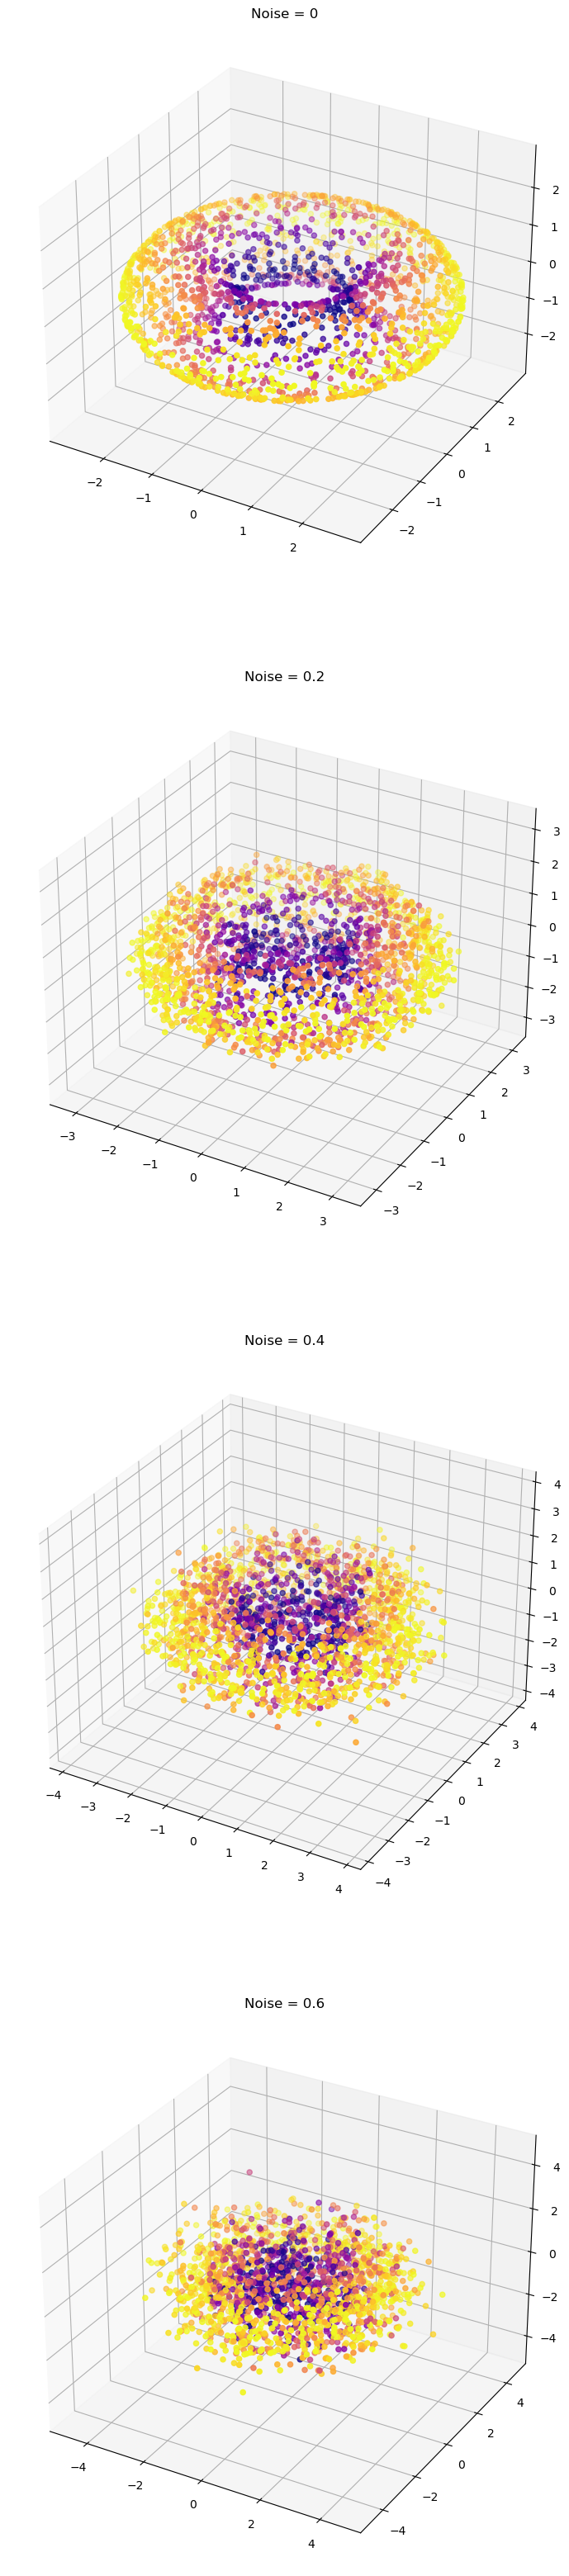

In [40]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Tori[nl]
    ks = Tori_ks_true[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")

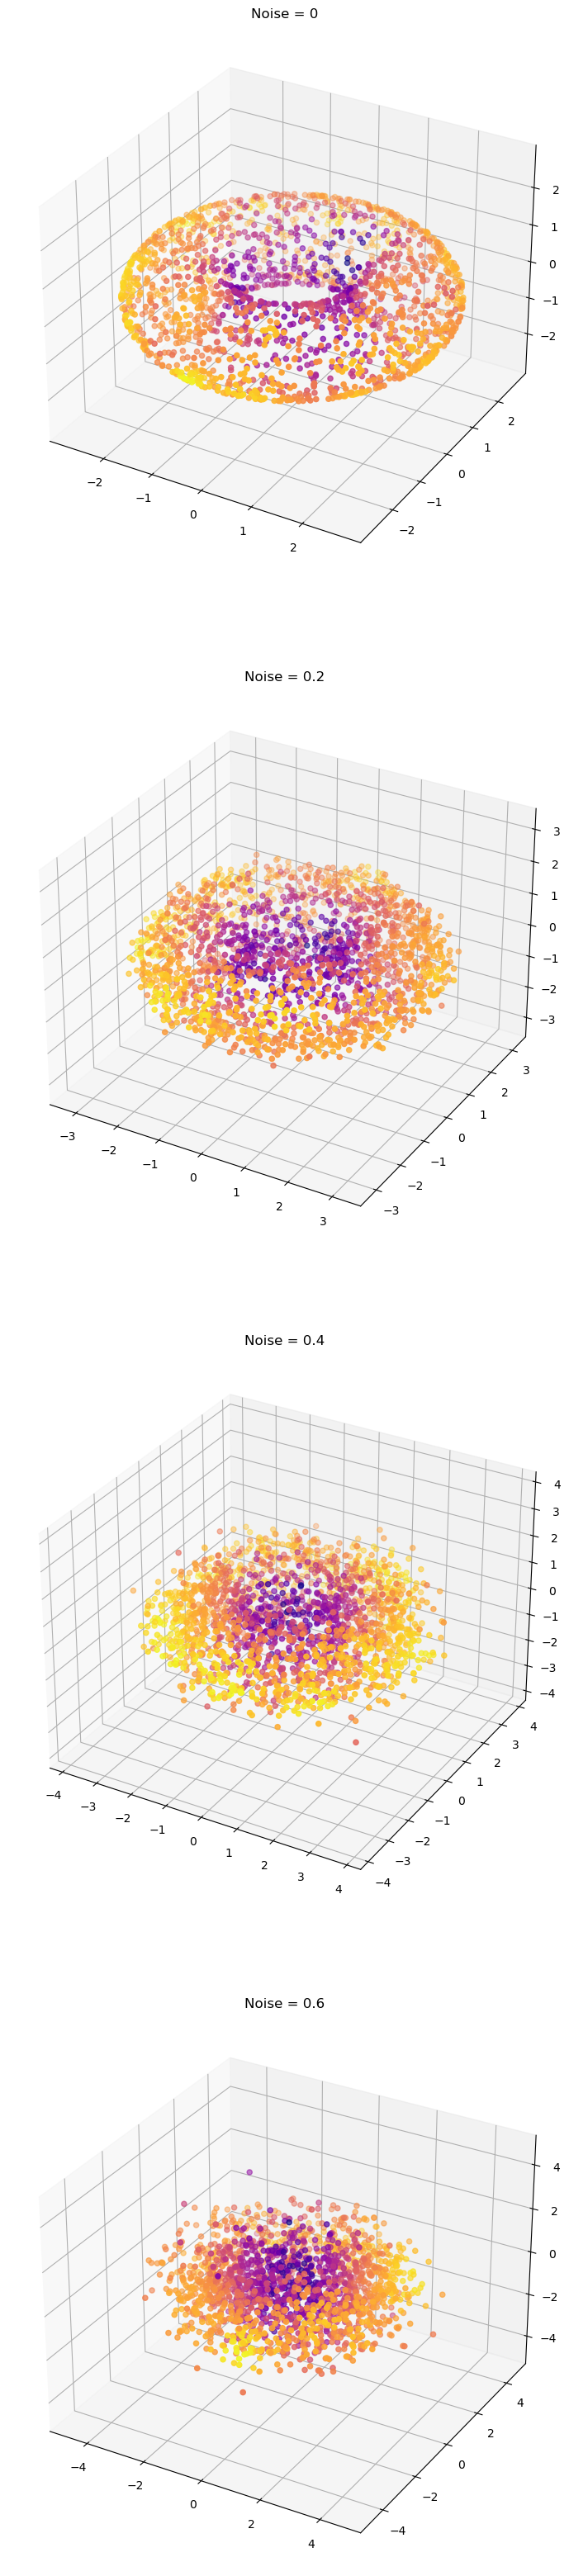

In [41]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Tori[nl]
    ks = Tori_ks_diffusion[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")